In [1]:
import spacy
import numpy as np
import pandas as pd
import seaborn as sns
from spacy.tokens import Doc
import matplotlib.pyplot as plt

In [2]:
train_json = pd.read_json("/kaggle/input/pii-detection-removal-from-educational-data/train.json")
train = pd.DataFrame(train_json)

In [18]:
train.head()

,document,full_text,tokens,trailing_whitespace,labels,ner_labels,count_ner_labels,count_distinct_ner_labels,B-NAME_STUDENT_train,I-NAME_STUDENT_train,...,B-EMAIL_counted,I-STREET_ADDRESS_counted,I-PHONE_NUM_counted,B-PHONE_NUM_counted,B-USERNAME_counted,B-STREET_ADDRESS_counted,I-ID_NUM_counted,I-URL_PERSONAL_counted,I-EMAIL_counted,I-USERNAME_counted
1103,9854,Waseem Mabunda 591 Smith Centers Apt. 656\nJo...,"[Waseem, Mabunda, , 591, Smith, Centers, Apt,...","[True, True, False, True, True, True, False, T...","[B-NAME_STUDENT, I-NAME_STUDENT, O, B-STREET_A...","[B-NAME_STUDENT, I-NAME_STUDENT, B-STREET_ADDR...",15,6,1,1,...,0,10,0,1,0,1,0,0,0,0
219,4777,"Assignment: Reflection on Design Thinking, Sto...","[Assignment, :, Reflection, on, Design, Thinki...","[False, True, True, True, True, False, True, T...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[B-NAME_STUDENT, I-NAME_STUDENT, I-NAME_STUDEN...",8,5,1,2,...,1,0,3,1,0,0,0,0,0,0
350,6243,Name: Jana Telfah Email: nbarker@hotmail.com ...,"[Name, :, Jana, Telfah, , Email, :, nbarker@h...","[False, True, True, True, False, False, True, ...","[O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, O, O...","[B-NAME_STUDENT, I-NAME_STUDENT, B-EMAIL, B-PH...",21,5,3,3,...,3,0,9,3,0,0,0,0,0,0
24,379,"COURSERA – University of Virginia, Darden Scho...","[COURSERA, –, University, of, Virginia, ,, Dar...","[True, True, True, True, False, True, True, Tr...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[B-NAME_STUDENT, I-NAME_STUDENT, B-EMAIL, B-UR...",6,4,2,2,...,1,0,0,0,0,0,0,0,0,0
440,7308,Md Carrillo\n\nlisarose@gmail.com\n\ndiazkrist...,"[Md, Carrillo, \n\n, lisarose@gmail.com, \n\n,...","[True, False, False, False, False, False, Fals...","[B-NAME_STUDENT, I-NAME_STUDENT, O, B-EMAIL, O...","[B-NAME_STUDENT, I-NAME_STUDENT, B-EMAIL, B-EM...",10,4,2,2,...,4,0,0,0,0,0,0,0,0,0


In [12]:
full_ner_labels = [
    'B-NAME_STUDENT', 'I-NAME_STUDENT',
    'B-URL_PERSONAL', 'I-URL_PERSONAL',
    'B-ID_NUM', 'I-ID_NUM',
    'B-EMAIL', 'I-EMAIL',
    'B-STREET_ADDRESS', 'I-STREET_ADDRESS',
    'B-PHONE_NUM', 'I-PHONE_NUM',
    'B-USERNAME', 'I-USERNAME'
]

In [22]:
train['ner_labels'] = train['labels'].apply(lambda x: [item for item in x if item != 'O'])
train['count_ner_labels'] = train['ner_labels'].str.len()  
train['count_distinct_ner_labels'] = train['ner_labels'].apply(lambda x: len(set(x)))

train.sort_values(by='count_distinct_ner_labels', inplace=True, ascending=False)

counted = pd.get_dummies(train['ner_labels'].explode()).groupby(level=0).sum()

frequency = counted.sum().sort_values(ascending=False)
ordered_columns = frequency.index.tolist()

counted = counted.reindex(columns=full_ner_labels, fill_value=0)[ordered_columns + [i for i in full_ner_labels if i not in ordered_columns]]

train = train.join(counted)


In [23]:
train.head()

,document,full_text,tokens,trailing_whitespace,labels,ner_labels,count_ner_labels,count_distinct_ner_labels,B-NAME_STUDENT_train,I-NAME_STUDENT_train,...,B-EMAIL,I-STREET_ADDRESS,I-PHONE_NUM,B-PHONE_NUM,B-USERNAME,B-STREET_ADDRESS,I-ID_NUM,I-URL_PERSONAL,I-EMAIL,I-USERNAME
1103,9854,Waseem Mabunda 591 Smith Centers Apt. 656\nJo...,"[Waseem, Mabunda, , 591, Smith, Centers, Apt,...","[True, True, False, True, True, True, False, T...","[B-NAME_STUDENT, I-NAME_STUDENT, O, B-STREET_A...","[B-NAME_STUDENT, I-NAME_STUDENT, B-STREET_ADDR...",15,6,1,1,...,0,10,0,1,0,1,0,0,0,0
350,6243,Name: Jana Telfah Email: nbarker@hotmail.com ...,"[Name, :, Jana, Telfah, , Email, :, nbarker@h...","[False, True, True, True, False, False, True, ...","[O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, O, O...","[B-NAME_STUDENT, I-NAME_STUDENT, B-EMAIL, B-PH...",21,5,3,3,...,3,0,9,3,0,0,0,0,0,0
219,4777,"Assignment: Reflection on Design Thinking, Sto...","[Assignment, :, Reflection, on, Design, Thinki...","[False, True, True, True, True, False, True, T...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[B-NAME_STUDENT, I-NAME_STUDENT, I-NAME_STUDEN...",8,5,1,2,...,1,0,3,1,0,0,0,0,0,0
24,379,"COURSERA – University of Virginia, Darden Scho...","[COURSERA, –, University, of, Virginia, ,, Dar...","[True, True, True, True, False, True, True, Tr...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[B-NAME_STUDENT, I-NAME_STUDENT, B-EMAIL, B-UR...",6,4,2,2,...,1,0,0,0,0,0,0,0,0,0
440,7308,Md Carrillo\n\nlisarose@gmail.com\n\ndiazkrist...,"[Md, Carrillo, \n\n, lisarose@gmail.com, \n\n,...","[True, False, False, False, False, False, Fals...","[B-NAME_STUDENT, I-NAME_STUDENT, O, B-EMAIL, O...","[B-NAME_STUDENT, I-NAME_STUDENT, B-EMAIL, B-EM...",10,4,2,2,...,4,0,0,0,0,0,0,0,0,0


In [25]:
num_documents = train.shape[0]

ner_labels_stat = (
    train[full_ner_labels]
    .melt(var_name='ner_label', value_name='count')
    .groupby('ner_label')['count']
    .agg(
        doc_count=lambda x: (x > 0).sum(),  
        ner_count='sum'
    )
    .assign(
        doc_count_percentage=lambda x: np.round(x['doc_count'] / num_documents, 4),
        ner_count_percentage=lambda x: np.round(x['ner_count'] / x['ner_count'].sum(), 4)
    )
    .reset_index()
    .sort_values('doc_count', ascending=False)
)

In [26]:
ner_labels_stat

,ner_label,doc_count,ner_count,doc_count_percentage,ner_count_percentage
2,B-NAME_STUDENT,891,1365,0.1309,0.4984
9,I-NAME_STUDENT,814,1096,0.1196,0.4001
5,B-URL_PERSONAL,72,110,0.0106,0.0402
1,B-ID_NUM,33,78,0.0048,0.0285
0,B-EMAIL,24,39,0.0035,0.0142
6,B-USERNAME,5,6,0.0007,0.0022
3,B-PHONE_NUM,4,6,0.0006,0.0022
10,I-PHONE_NUM,3,15,0.0004,0.0055
4,B-STREET_ADDRESS,2,2,0.0003,0.0007
11,I-STREET_ADDRESS,2,20,0.0003,0.0073


In [27]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_ner_distribution(ner_labels_stat, count_col, percentage_col):
    plt.figure(figsize=(16, 8))
    unique_labels = ner_labels_stat['ner_label'].unique()
    colors = plt.cm.hsv(np.linspace(0, 1, len(unique_labels)))

    plt.bar(ner_labels_stat['ner_label'], ner_labels_stat[count_col], color=colors, label='Count')
    
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    sec_axis = plt.twinx()
    sec_axis.plot(ner_labels_stat['ner_label'], ner_labels_stat[percentage_col], color='r', marker='o', label='Percentage')
    sec_axis.set_ylabel('Percentage')

    plt.title('Count / Percentage of NER Labels')
    plt.xlabel('NER Label')
    plt.legend(loc='upper left')
    sec_axis.legend(loc='upper right')

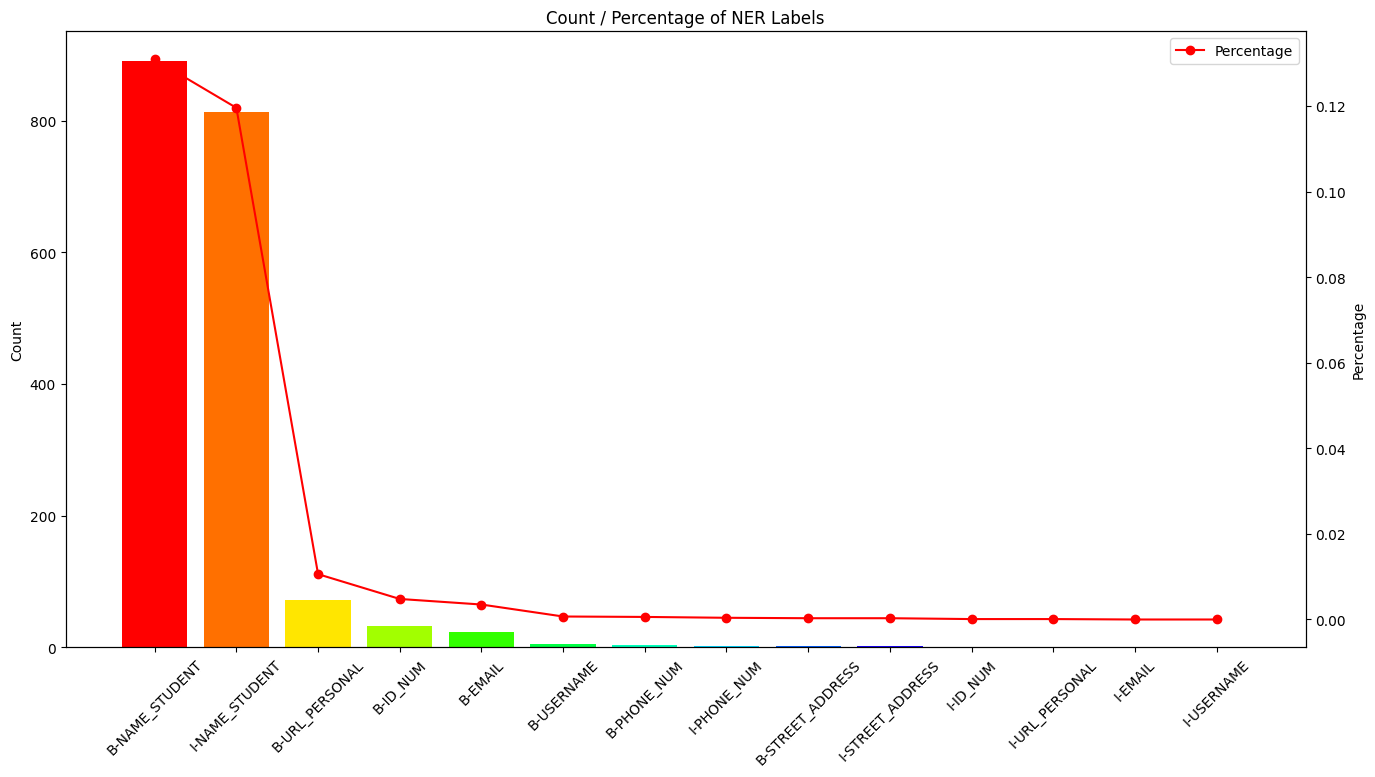

In [28]:
plot_ner_distribution(ner_labels_stat, 'doc_count', 'doc_count_percentage')

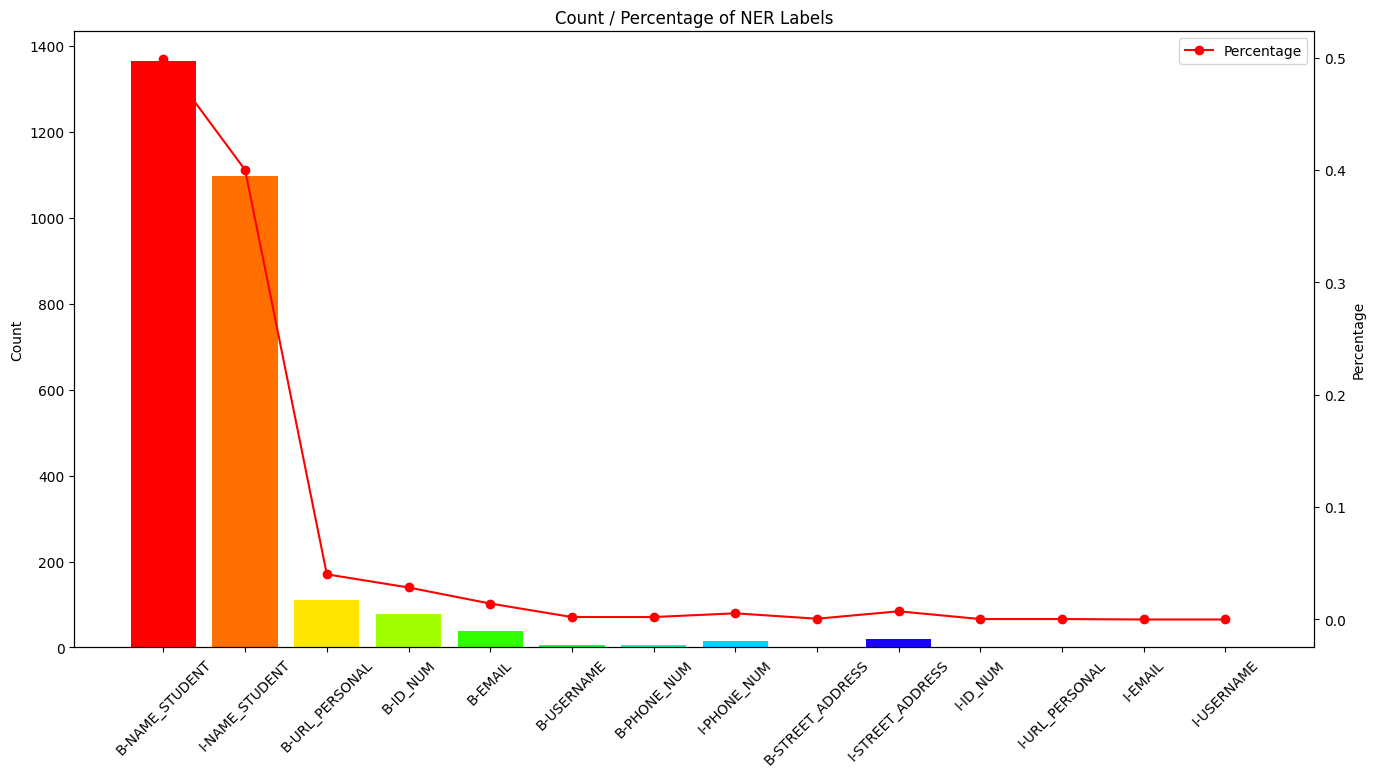

In [29]:
plot_ner_distribution(ner_labels_stat, 'ner_count', 'ner_count_percentage')

In [36]:
import spacy
from spacy import displacy

In [30]:
ner_df = train[train['count_ner_labels']>0]

In [59]:
ner_df.head(5)

,document,full_text,tokens,trailing_whitespace,labels,ner_labels,count_ner_labels,count_distinct_ner_labels,B-NAME_STUDENT_train,I-NAME_STUDENT_train,...,B-EMAIL,I-STREET_ADDRESS,I-PHONE_NUM,B-PHONE_NUM,B-USERNAME,B-STREET_ADDRESS,I-ID_NUM,I-URL_PERSONAL,I-EMAIL,I-USERNAME
1103,9854,Waseem Mabunda 591 Smith Centers Apt. 656\nJo...,"[Waseem, Mabunda, , 591, Smith, Centers, Apt,...","[True, True, False, True, True, True, False, T...","[B-NAME_STUDENT, I-NAME_STUDENT, O, B-STREET_A...","[B-NAME_STUDENT, I-NAME_STUDENT, B-STREET_ADDR...",15,6,1,1,...,0,10,0,1,0,1,0,0,0,0
350,6243,Name: Jana Telfah Email: nbarker@hotmail.com ...,"[Name, :, Jana, Telfah, , Email, :, nbarker@h...","[False, True, True, True, False, False, True, ...","[O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, O, O...","[B-NAME_STUDENT, I-NAME_STUDENT, B-EMAIL, B-PH...",21,5,3,3,...,3,0,9,3,0,0,0,0,0,0
219,4777,"Assignment: Reflection on Design Thinking, Sto...","[Assignment, :, Reflection, on, Design, Thinki...","[False, True, True, True, True, False, True, T...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[B-NAME_STUDENT, I-NAME_STUDENT, I-NAME_STUDEN...",8,5,1,2,...,1,0,3,1,0,0,0,0,0,0
24,379,"COURSERA – University of Virginia, Darden Scho...","[COURSERA, –, University, of, Virginia, ,, Dar...","[True, True, True, True, False, True, True, Tr...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[B-NAME_STUDENT, I-NAME_STUDENT, B-EMAIL, B-UR...",6,4,2,2,...,1,0,0,0,0,0,0,0,0,0
440,7308,Md Carrillo\n\nlisarose@gmail.com\n\ndiazkrist...,"[Md, Carrillo, \n\n, lisarose@gmail.com, \n\n,...","[True, False, False, False, False, False, Fals...","[B-NAME_STUDENT, I-NAME_STUDENT, O, B-EMAIL, O...","[B-NAME_STUDENT, I-NAME_STUDENT, B-EMAIL, B-EM...",10,4,2,2,...,4,0,0,0,0,0,0,0,0,0


In [58]:
def findSpans(data_element):
    tokens = [str(token) + " " if flag else str(token)
              for token, flag in zip(data_element["tokens"], data_element["trailing_whitespace"])]
    labels = data_element["labels"]
    
    text = ''.join(tokens)
    ent_list = []
    sp = 0
    label_name = ""
    in_span = False
    
    for i, (label, token) in enumerate(zip(labels, tokens)):
        len_token = len(token)
        if label.startswith("O") and in_span:
            ent_list.append({"start": sp, "end": sp + len_token, "label": label_name, "ner_text": text[sp:sp + len_token]})
            in_span = False
        elif label.startswith("B"):
            if in_span:
                ent_list.append({"start": sp, "end": sp + len_token, "label": label_name, "ner_text": text[sp:sp + len_token]})
            sp = sum(len(t) for t in tokens[:i])
            label_name = label[2:]
            in_span = True
        elif label.startswith("I") and in_span:
            assert label_name == label[2:], "I-label does not match B-label"

        if in_span:
            ep = sum(len(t) for t in tokens[:i + 1])
            # Update the last entity in ent_list if still in the same span
            if ent_list and ent_list[-1]['label'] == label_name:
                ent_list[-1].update({"end": ep, "ner_text": text[sp:ep]})
            elif label.startswith("B"):
                ent_list.append({"start": sp, "end": ep, "label": label_name, "ner_text": text[sp:ep]})
    
    return {
        'text': text,
        "ents": ent_list
    }

In [60]:
doc = findSpans(ner_df.iloc[0])

In [61]:
doc

{'text': "Waseem Mabunda  591 Smith Centers Apt. 656\nJoshuamouth, RI 95963 ( The Netherlands)  410.526.1667  vpi@mn.nl\n\nMind Mapping,      Challenge:     For several years I have been working for an Asset manager in the Netherlands. During this period I have been involved in many  projects. Certainly in the world of asset management, much has changed in recent years in the area of Law and Regulations.  What I mainly experience in these projects is that all departments have a different interest in starting a new project. This  certainly does not benefit the project. How do you get everyone to complete a project in the common interest and how do you  motivate everyone who participate in the project?    Selection:    An improvement project can be approached in different ways. The most common way is the scrum approach. We work in  multidisciplinary teams that work in short sprints, with a fixed length of 1 to 4 weeks. Cooperation is very important and  everyone must be able to respond q

In [62]:
LABEL_COLORS = {
    "NAME_STUDENT": "#7aecec",
    "EMAIL": "#bfeeb7",
    "USERNAME": "#feca74",
    "ID_NUM": "#ff9561",
    "PHONE_NUM": "#aa9cfc",
    "URL_PERSONAL": "#c887fb",
    "STREET_ADDRESS": "#9cc9cc",
}
displacy_options = {"colors": LABEL_COLORS}

In [63]:
displacy.render(doc, style="ent", manual=True, options=displacy_options)